In [36]:
#! usr/bin/env python3
import praw
import pandas as pd
import datetime as dt
import sys
import string
import simplejson
import sched, time
import tweepy
from tweepy import OAuthHandler
import json
from math import log
import time
import re, string
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict
import csv
import unicodedata
from wordcloud import WordCloud 
import random



In [2]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

/Users/Devon/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
reddit = praw.Reddit(client_id='BQg2NTa99N5PVw', \
                     client_secret='dkfnSFyQc1rgi-eLY2DAszZOBQM', \
                     user_agent='Keyword', \
                     username='Devonolopous', \
                     password='Nachito17')

In [ ]:
no_subreddit = reddit.subreddit('all')

In [ ]:
hot = no_subreddit.hot(limit=1000)

In [ ]:
subreddit1 = reddit.subreddit('news')

In [ ]:
news_subreddit = subreddit1.hot(limit=1000)

In [ ]:
subreddit2 = reddit.subreddit('videogames')

In [ ]:
games_subreddit = subreddit2.hot(limit=1000)

In [ ]:
#t = sched.scheduler(time.time, time.sleep)
dict1 = {'title':[],
       'subreddit':[],
       'score':[],
       'created':[],
       'body':[]}
dict2 = {'title':[],
       'subreddit':[],
       'score':[],
       'created':[],
       'body':[]}
dict3 = {'title':[],
       'subreddit':[],
       'score':[],
       'created':[],
       'body':[]}
#def mahfunc(si):
    #count = 0
    #count = count + 1
    #t.enter(60, 1, mahfunc, (si,))
for submission in news_subreddit:
    if submission.title not in dict1['title']:
        dict1['title'].append(submission.title)
        dict1['subreddit'].append(submission.subreddit)
        dict1['score'].append(submission.score)
        dict1['created'].append(submission.created)
        dict1['body'].append(submission.selftext)
for submission in games_subreddit:
    if submission.title not in dict2['title']:
        dict2['title'].append(submission.title)
        dict2['subreddit'].append(submission.subreddit)
        dict2['score'].append(submission.score)
        dict2['created'].append(submission.created)
        dict2['body'].append(submission.selftext)
for submission in hot:
    if submission.title not in dict3['title']:
        dict3['title'].append(submission.title)
        dict3['subreddit'].append(submission.subreddit)
        dict3['score'].append(submission.score)
        dict3['created'].append(submission.created)
        dict3['body'].append(submission.selftext)
#print(count)
dd = {}
for d in (dict1, dict2, dict3):
    for k, v in d.items():
        dd.setdefault(k, []).append(v)
    

    #df  = pd.DataFrame([dict], columns=dict.keys())
    #df_red = pd.concat([df_red, df], axis =0).reset_index()
    #return (dict1, dict2, dict3)
    #t.enter(60, 1, mahfunc, (t,))
    #t.run()

In [ ]:
for k, v in dd.items():
    tmp=[]
    for i in v:
        if isinstance(i,list):
            tmp.extend(i)
        else:
            tmp.append(i)
    dd[k] = tmp
print(dd)

In [ ]:
df  = pd.DataFrame.from_dict(dd, orient='index').transpose()

In [ ]:
df

In [ ]:
df = pd.to_csv('dframe1.csv')

In [ ]:
df.columns.unique()

In [ ]:
def get_time(created):
    return dt.datetime.fromtimestamp(created)
df['created'] = df['created'].apply(get_time)

In [ ]:
df

In [ ]:
df['subreddit'] = df['subreddit'].apply(lambda x: x.display_name)

In [ ]:
df = pd.get_dummies(df, columns=['subreddit'], drop_first=True)

In [ ]:
X = df['title'] # Try adding additional features!
y = df['score']

In [ ]:
from twython import Twython

In [3]:
import sys
sys.path.append(".")
consumer_key = '5rLFEl5YqSKIUShhVGP0ohLLz'
consumer_secret = 'OTBI4gTnHPPf0TT7q56iHPUuSJRPcyHnbGphVPLNwxVG853Md0'
access_token = '2981818571-ecOZsiZctDbuE7MupiZeBBXOIONLPaYPXmWvG5N'
access_token_secret = 'sjXtQZSnZ23QkGUEPmBh7KYVok9PTL4ipEot0maEYUIAS'

In [ ]:
twitter = Twitter(auth = OAuth(access_key,
                  access_secret,
                  consumer_key,
                  consumer_secret))

In [ ]:
def serialize(obj):
    """JSON serializer for objects not serializable by default json code"""

    if isinstance(obj, date):
        serial = obj.isoformat()
        return serial

    if isinstance(obj, time):
        serial = obj.isoformat()
        return serial

    return obj.__dict__


serialize(apexlist)

json.dumps(myObj, default=serialize)


In [ ]:
def twit(value):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)
    searchQuery = 'Apex Legends OR Apex OR APEX LEGENDS OR APEX OR apex legends OR apex OR #Apex OR #ApexLegends'
    csvFile = open('apexfinal.csv', 'a')
    csvWriter = csv.writer(csvFile)
    
    while True:
        try:
            for tweet in tweepy.Cursor(api.search, q=searchQuery +" -filter:retweets", tweet_mode='extended', count=10000, 
            lang='en', retry_count = 5, retry_delay = 5, since='2019-01-01').items():
                csvWriter.writerow([tweet.created_at, tweet.full_text])
                unicodedata.normalize('NFKD', tweet.full_text).encode('ascii', 'ignore')
                print(tweet.created_at, tweet.full_text)
                
            
        except tweepy.error.TweepError as e:
            print(str(e))
            
        time.sleep(value)
    csvFile.close()

In [ ]:
twit(1)

In [ ]:
df_tweett['text'] = df_tweett['text'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore'))


In [ ]:
import csv

path =  '/Users/Devon/Python_Files/training.1600000.processed.noemoticon.csv'

with open(path, 'r', encoding='utf-8', errors='ignore') as infile, open(path + 'final.csv', 'w') as outfile:
    inputs = csv.reader(infile)
    output = csv.writer(outfile)

    for index, row in enumerate(inputs):
         # Create file with no header
        if index == 0:
            continue
        output.writerow(row)

In [4]:
data = pd.read_csv('training.1600000.processed.noemoticon.csvfinal.csv',
                   error_bad_lines=False, encoding='utf-8')
data.columns = ['target', 'id','date','flag', 'user', 'text']
data.head(2)
# get text and matching label columns
data = data.drop(['id','user', 'flag'],axis=1)
data.head(10)

,target,date,text
0,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
1,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
2,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
3,0,Mon Apr 06 22:20:00 PDT 2009,@Kwesidei not the whole crew
4,0,Mon Apr 06 22:20:03 PDT 2009,Need a hug
5,0,Mon Apr 06 22:20:03 PDT 2009,@LOLTrish hey long time no see! Yes.. Rains a...
6,0,Mon Apr 06 22:20:05 PDT 2009,@Tatiana_K nope they didn't have it
7,0,Mon Apr 06 22:20:09 PDT 2009,@twittera que me muera ?
8,0,Mon Apr 06 22:20:16 PDT 2009,spring break in plain city... it's snowing
9,0,Mon Apr 06 22:20:17 PDT 2009,I just re-pierced my ears


In [41]:
negatives = data['target'][data.target == 0]
positives = data['target'][data.target == 4]
print('number of positive tagged sentences is:  {}'.format(len(positives)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('total length of the data is:            {}'.format(data.shape[0]))

number of positive tagged sentences is:  800000
number of negative tagged sentences is: 799998
total length of the data is:            1599998


In [6]:
def word_count(sentence):
    return len(sentence.split())
    
data['word count'] = data['text'].apply(word_count)
data.head(3)

,target,date,text,word count
0,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,18
1,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,10
2,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",21


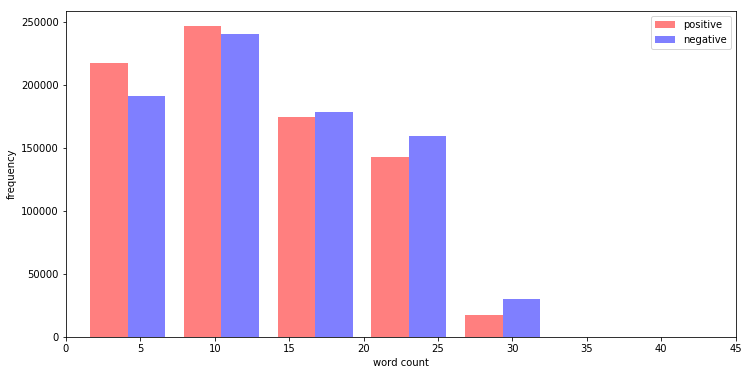

In [7]:
x = data['word count'][data.target == 4]
y = data['word count'][data.target == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [8]:
every_word = []
for line in list(data['text']):
    words = line.split()
    for word in words:
        every_word.append(word.lower())
        
Counter(every_word).most_common(20)

[('i', 746603),
 ('to', 560313),
 ('the', 518736),
 ('a', 376421),
 ('my', 312847),
 ('and', 295674),
 ('you', 237765),
 ('is', 231086),
 ('for', 214051),
 ('in', 209960),
 ('it', 191053),
 ('of', 182599),
 ('on', 161592),
 ('so', 145770),
 ('have', 143295),
 ('that', 128775),
 ('me', 128490),
 ("i'm", 127616),
 ('but', 124676),
 ('just', 124453)]

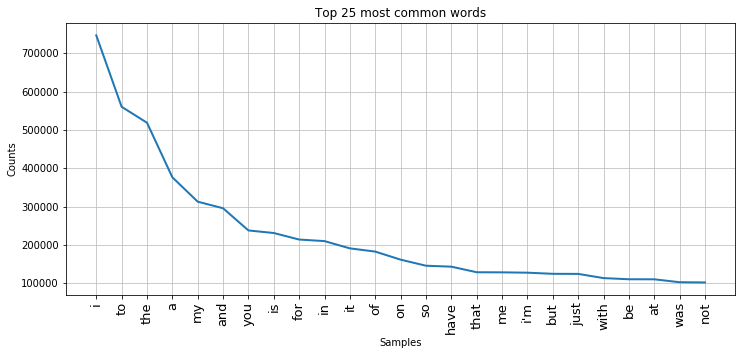

Text(0.5, 1.0, 'log-log plot of words frequency')

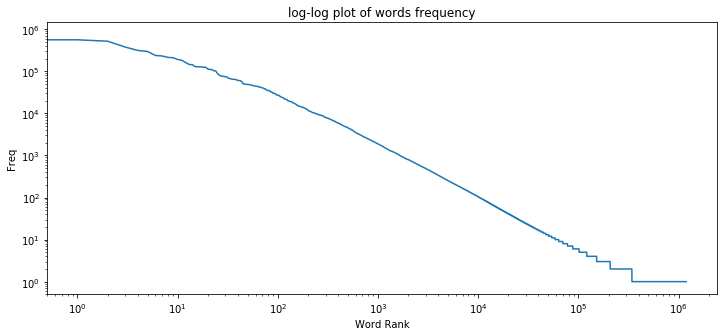

In [9]:
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(every_word)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(every_word).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [ ]:
import csv

In [ ]:
data = []
with open('tweets.20150430-223406.json') as f:
    for line in f:
        data.append(json.loads(line))

In [ ]:
df_data = pd.DataFrame(data)
df_data.to_csv('tweeter.csv', index=False)

In [ ]:
f = r'C:\Macintosh HD⁩\Users⁩\Devon⁩\python_files⁩\apexres.csv'
data = f.decode('utf-8').splitlines()

# Open the file for writing
with open("tmp.csv", "w") as csv_file:
    # Create the writer object with tab delimiter
    writer = csv.writer(csv_file)
    for line in data:
        # Writerow() needs a list of data to be written, so split at all empty spaces in the line 
        writer.writerow(re.split('\s+',line))

In [38]:
col_names=['date','text']
# read csv
df_og = pd.read_csv('apexfinal.csv', names=col_names, low_memory=False)
# check head
df_og.head(50)

,date,text
0,2019-08-07 21:59:03,"—————————————————\n▫️On part en live, chill, r..."
1,2019-08-07 21:58:35,@shroud Shroud check out my apex song I made 1...
2,2019-08-07 21:58:29,Who wants a sick stream? I will look like crap...
3,2019-08-07 21:58:26,@youngbuckeen @Gilofthepeople you aren't one o...
4,2019-08-07 21:58:16,@danielaremson @aproko_doctor @sexydjbabylynn ...
5,2019-08-07 21:58:05,Some good friends putting our off street motor...
6,2019-08-07 21:57:31,Check out my broadcast from my PlayStation 4! ...
7,2019-08-07 21:57:27,WHAT'S GOING ON EVERYONE WE ARE LIVE LETS GET ...
8,2019-08-07 21:57:27,I really can’t believe that nerf a character t...
9,2019-08-07 21:57:24,Going live today on Mixer! Will be playing som...


In [ ]:
dfToList = df_tweett['text'].tolist()

dfList = list(df_tweett['text'])

dfValues = df_tweett['text'].values

In [ ]:
print(dfValues)

In [ ]:
df_tweett['text'] = df_tweett['text'].apply(lambda x: urllib.parse.parse_qs(x.decode()))

In [ ]:
df_tweett.head()

In [11]:
import unicodedata
def prTweet(tweets):
    tweets = re.sub(r'\&\w*;', '', str(tweets))
    tweets = re.sub('@[^\s]+', '', tweets)
    tweets = re.sub(r'\$\w*', '', tweets)
    tweets = tweets.lower()
    tweets = re.sub(r'https?:\/\/.*\/\w*', '', tweets)
    tweets = re.sub(r'#\w*', '', tweets)
    tweets = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweets)
    tweets = re.sub(r'\b\w{1,2}\b', '', tweets)
    tweets = re.sub(r'\s\s+', ' ', tweets)
    tweets = tweets.lstrip(' ')
    tweets = ''.join(c for c in unicodedata.normalize('NFC', tweets) if c <= '\uFFFF')
    return tweets

In [ ]:
df_tweett['text'] = df_tweett['text'].apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))


In [12]:
df_tweett['text'] = df_tweett['text'].apply(prTweet)
df_tweett['text'].head(25)

0     —————————————————\n▫️ part live chill road abo...
1      shroud check out apex song made 100 miles remix 
2     who wants sick stream will look like crap and ...
3     you aren one the apex trees this situation chr...
4                                  daughter’ dog  neli 
5     some good friends putting our off street motor...
6     check out broadcast from playstation apex lege...
7     what going everyone are live lets get hype bab...
8     really can’ believe that nerf character that w...
9     going live today mixer will playing some apex ...
10    just trying find scrim level partner’ for fort...
11                          you miss when you leave lol
12    dropped into apex legends for the first time s...
13    ⚡️‍⚡️ favorite apex legend can you emoji your ...
14    going live going play some for the first half ...
15               apex legends live guys and grils live 
16                                           apex then 
17    don know think civilization built sentient

In [ ]:
df_tweett['text'] = str(df_tweett['text'], "utf8", errors="ignore")

In [ ]:
df_tweet.head(30)

In [13]:
games_words = []
for line in list(df_tweett['text']):
    words = line.split()
    for word in words:
        games_words.append(word.lower())

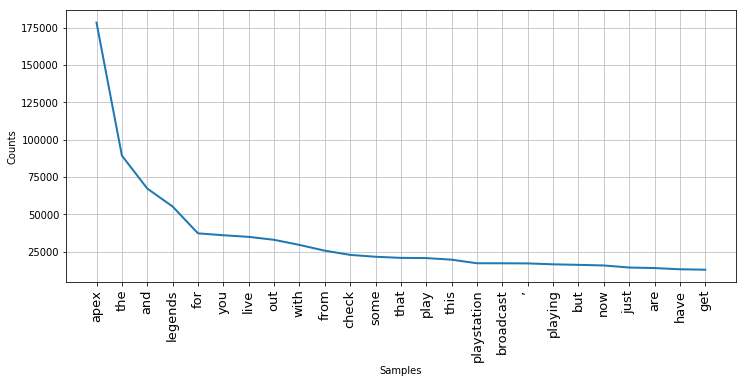

Text(0.5, 0, 'Word Rank')

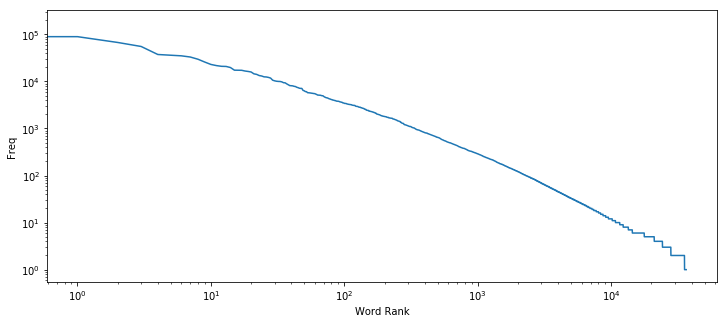

In [14]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(games_words)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(games_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [19]:
def textClean(raw_text):
    nop = [char for char in list(raw_text) if char not in string.punctuation]
    nop = ''.join(nop)
    return [word for word in nop.lower().split() if word.lower() not in stopwords.words('english')]
def removeW(word_list):
    remove = ['...','“','”','’','…','apex','legends']
    return [w for w in word_list if w not in remove]

In [20]:
df_tweett = df_tweett.copy()
df_tweett['tokens'] = df_tweett['text'].apply(textClean) # tokenize style 1
df_tweett['no_apex'] = df_tweett['tokens'].apply(removeW) #tokenize style 2
df_tweett.head()

,date,text,tokens,no_noobs,no_apex
0,2019-08-07 21:59:03,—————————————————\n▫️ part live chill road abo...,"[—————————————————, ▫️, part, live, chill, roa...","[—————————————————, ▫️, part, live, chill, roa...","[—————————————————, ▫️, part, live, chill, roa..."
1,2019-08-07 21:58:35,shroud check out apex song made 100 miles remix,"[shroud, check, apex, song, made, 100, miles, ...","[shroud, check, apex, song, made, 100, miles, ...","[shroud, check, song, made, 100, miles, remix]"
2,2019-08-07 21:58:29,who wants sick stream will look like crap and ...,"[wants, sick, stream, look, like, crap, pregna...","[wants, sick, stream, look, like, crap, pregna...","[wants, sick, stream, look, like, crap, pregna..."
3,2019-08-07 21:58:26,you aren one the apex trees this situation chr...,"[one, apex, trees, situation, chris, trees, ca...","[one, apex, trees, situation, chris, trees, ca...","[one, trees, situation, chris, trees, catholic]"
4,2019-08-07 21:58:16,daughter’ dog neli,"[daughter’, dog, neli]","[daughter’, dog, neli]","[daughter’, dog, neli]"


In [21]:
del df_tweett['no_noobs']


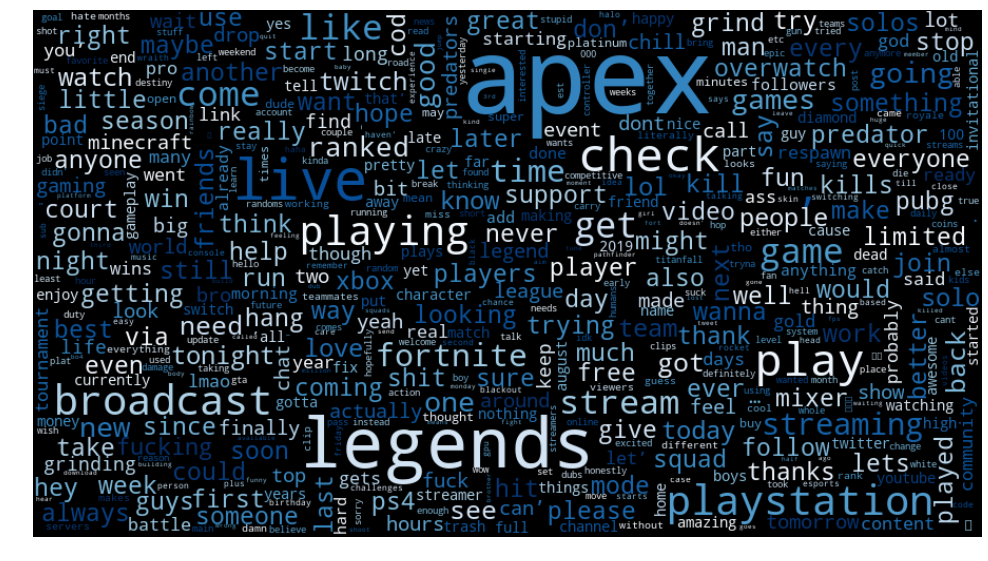

In [25]:
every_word = []
for line in df_tweett['tokens']:
    every_word.extend(line)
    
word_freq = Counter(every_word)

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(word_freq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
bow_transformer = CountVectorizer(analyzer=textClean).fit(df_tweett['text'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
messages_bow = bow_transformer.transform(df_tweett['text'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
tfidf_transformer = TfidfTransformer().fit(messages_bow)

36324
Shape of Sparse Matrix:  (212585, 36324)
Amount of Non-Zero occurences:  1868245


In [26]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['love']])

4.8069024214615075


In [27]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(212585, 36324)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2)

In [30]:
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [31]:
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }
# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)
# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 52.6min finished



Best Model: 0.755964 using {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.738476 Stdev:(0.001679) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.753236 Stdev:(0.001589) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.737800 Stdev:(0.001654) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.748582 Stdev:(0.001663) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.738803 Stdev:(0.001017) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.755964 Stdev:(0.001292) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.728618 Stdev:(0.001164) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.741967 Stdev:(0.001072) with: {'bow__ngram_range'

In [33]:
joblib.dump(grid, "apex_sentiment.pkl")

model_NB = joblib.load("apex_sentiment.pkl" )
y_preds = model_NB.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.756215625


confusion matrix: 
 [[123432  36784]
 [ 41227 118557]]


              precision    recall  f1-score   support

           0       0.75      0.77      0.76    160216
           4       0.76      0.74      0.75    159784

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [39]:
tweet_preds = model_NB.predict(df_og['text'])
df_tweet_preds = df_og.copy()
df_tweet_preds['predictions'] = tweet_preds
df_tweet_preds.shape

(212585, 3)

In [40]:
index = random.sample(range(tweet_preds.shape[0]), 20)
for text, sentiment in zip(df_tweet_preds.text[index],
                           df_tweet_preds.predictions[index]):
    print (sentiment, '--', text, '\n')

0 -- @Excision did the apex remixes get removed from iTunes? 

4 -- good couple of wins on apex today - reached plat 3 &amp; about 8 points from plat 2!

Diamond rank is super close :)

thanks to all who tuned into the stream, I have a new mindset on my stream which helps with long term streaming so I should be more consistent now 

4 -- Xim Apex Legends New AA Settings Are Beast! https://t.co/O3CTBEbRjs via @YouTube 

4 -- @DeadCaptCastle Wait but are u guys in a psn party or in an apex party where u can hear everyone else? 

4 -- This really a wild era https://t.co/MngpyDR3XT 

0 -- @ring_of_elysium leave that shit to APEX dont need it on RoE 

0 -- Remember how bad the alternator used to be? 🤢 #ApexLegends #Apex #Season2 #SquadWipe #GamingCommunity https://t.co/G1WP0uIIsD 

4 -- never played apex legends is it good 

4 -- I am currently looking for two players for a 4k to win Apex tournament must be gold.or higher msg here or @AlgVader 

0 -- @APEX_DiANNA the kill limit is 100 and w

In [42]:
pos = df_tweet_preds.predictions.value_counts()[4]
neg = df_tweet_preds.predictions.value_counts()[0]
print('Model predictions: Positives - {}, Negatives - {}'.format(neg,pos))
# save dataframe with appended preditions 
df_tweet_preds.to_pickle('apex_predicts_df.p')

Model predictions: Positives - 91538, Negatives - 121047
